The purpose of this project was to get practice with analyzing datasets to draw insights and identify features for a decision tree regression model. The tools I used for this project were Pandas, Matplotlib, and Sci Kit Learn. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

open_file1 = open(r"../input/advertising/advertising.csv")

df_ads = pd.read_csv(open_file1)

In [2]:
df_ads.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

In [3]:
df_ads.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
df_ads.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [5]:
df_ads.isna().sum().sum()

0

In [6]:
df_age_clicks = df_ads[["Age", "Clicked on Ad"]]

In [7]:
age_count_clicks = df_age_clicks.groupby(["Age"]).sum()

age_count_clicks.head()

,Clicked on Ad
Age,
19,1
20,1
21,0
22,1
23,8


In [8]:
age_count_tot = df_age_clicks["Age"].value_counts().sort_index(ascending = True)

In [9]:
age_count_tot.head()

19     6
20     6
21     6
22    13
23    19
Name: Age, dtype: int64

In [10]:
df_age_clicked = pd.concat([age_count_clicks, age_count_tot], axis=1)

In [11]:
df_age_clicked.rename(columns = {"Age" : "Total"}, inplace = True)

In [12]:
df_age_clicked.head()

,Clicked on Ad,Total
19,1,6
20,1,6
21,0,6
22,1,13
23,8,19


In [13]:
df_age_clicked["Percent Clicked"] = (df_age_clicked["Clicked on Ad"]/df_age_clicked["Total"]) * 100

In [14]:
df_age_clicked["Index"] = range(0, 0 + len(df_age_clicked))

df_age_clicked = df_age_clicked.reset_index().set_index('Index')

In [15]:
df_age_clicked = df_age_clicked.rename(columns = {"index" : "Age"})

In [16]:
df_age_clicked.head()

,Age,Clicked on Ad,Total,Percent Clicked
Index,,,,
0,19,1,6,16.666667
1,20,1,6,16.666667
2,21,0,6,0.000000
3,22,1,13,7.692308
4,23,8,19,42.105263


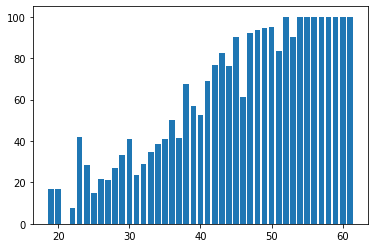

In [17]:
percent = df_age_clicked["Percent Clicked"]

age = df_age_clicked["Age"]

plt.bar(age, percent)

plt.show()

While the data for the 50-60 age group is limited, there does appear to be a correlation between age and clicking on the ad. 

In [18]:
clicked = df_ads.loc[df_ads["Clicked on Ad"] == 1]

no_clicked = df_ads.loc[df_ads["Clicked on Ad"] == 0]

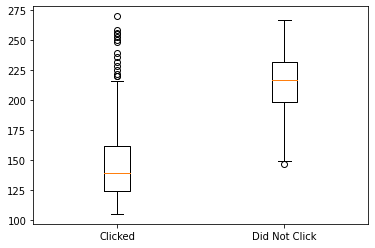

In [19]:
use_clicked = clicked["Daily Internet Usage"]

use_no_clicked = no_clicked["Daily Internet Usage"]

plot_data = [use_clicked, use_no_clicked]

fig, ax = plt.subplots()

ax.boxplot(plot_data)

ax.set_xticklabels(['Clicked', 'Did Not Click'])

plt.show()

Given the groupings of the amount of time spent on the internet, the more time one spends on the internet, the less 

In [20]:
clicked_total = clicked["Male"].count()

no_clicked_total = no_clicked["Male"].count()

In [21]:
male_clicked = clicked.loc[:, "Male"].sum()

female_clicked = clicked_total - male_clicked

male_no_clicked = no_clicked.loc[:, "Male"].sum()

female_no_clicked = no_clicked_total - male_no_clicked

male_clicked_perc = male_clicked / clicked_total * 100

female_clicked_perc = female_clicked / clicked_total * 100

male_no_clicked_perc = male_no_clicked / no_clicked_total * 100

female_no_clicked_perc = female_no_clicked / no_clicked_total * 100

In [22]:
print("Female Clicked Percentage: " + str(female_clicked_perc))

print("Male Clicked Percentage: " + str(male_clicked_perc))

print("Female No Click Percentage: " + str(female_no_clicked_perc))

print("Male No Click Percentage: " + str(male_no_clicked_perc))

Female Clicked Percentage: 53.800000000000004
Male Clicked Percentage: 46.2
Female No Click Percentage: 50.0
Male No Click Percentage: 50.0


It does not appear that there is a significant difference between genders in if they clicked on the ad or not

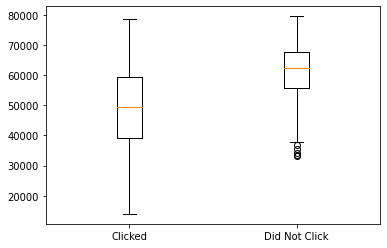

In [23]:
income_clicked = clicked["Area Income"]

income_no_clicked = no_clicked["Area Income"]

plot_data = [income_clicked, income_no_clicked]

fig, ax = plt.subplots()

ax.boxplot(plot_data)

ax.set_xticklabels(['Clicked', 'Did Not Click'])

plt.show()

Based upon the box and whisker plots above, it appears that on average the area income of those that did not click the ad is higher than those that did click the ad.

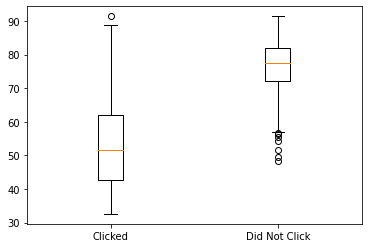

In [24]:
time_clicked = clicked["Daily Time Spent on Site"]

time_no_clicked = no_clicked["Daily Time Spent on Site"]

plot_data = [time_clicked, time_no_clicked]

fig, ax = plt.subplots()

ax.boxplot(plot_data)

ax.set_xticklabels(['Clicked', 'Did Not Click'])

plt.show()

Daily time spent on site also seems to be an indicator of if someone will click on an ad or not. The average time spent on the site was less for individuals that clicked on the ad. This will be a good feature to use in the prediction model. 

In [25]:
click_country = clicked["Country"].value_counts().rename_axis('Country').reset_index(name='Count')

click_country.describe()

,Count
count,215.000000
mean,2.325581
std,1.313498
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,7.000000


In [26]:
no_click_country = no_clicked["Country"].value_counts().rename_axis('Country').reset_index(name = 'Count')

no_click_country.describe()

,Count
count,215.000000
mean,2.325581
std,1.190322
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,6.000000


Given there are 215 countries in the dataset, there does not appear to be significant variation between countries. I'm electing not to use country as a factor in our prediction model as I suspect it could over fit the model to the training data. 

In [27]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error as mse

from sklearn.tree import DecisionTreeRegressor

X = df_ads[["Daily Time Spent on Site", "Age", "Area Income", "Daily Internet Usage"]]

y = df_ads["Clicked on Ad"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 1) 

regressor = DecisionTreeRegressor(random_state = 0)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print(mse(y_test, y_pred))

0.06666666666666667


The decision tree regression model could be improved through specification of optimal hyperparameters, but for the purposes of this exercise I am satisfied with a Mean Squared Error of .067.